In [ ]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from kneed import KneeLocator

from sklearn import manifold
from sklearn.ensemble import RandomForestClassifier

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor


In [14]:
# dir(IForest())
import numpy as np
from sklearn.neighbors import KernelDensity

rng = np.random.RandomState(42)
X = rng.random_sample((30, 1))
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
log_density = kde.score_samples(X)
log_density


array([-0.95848764, -1.07967017, -0.99753665, -0.96915149, -0.99287975,
       -0.99288599, -1.02266461, -1.04268659, -0.96952584, -0.99123456,
       -1.03642657, -1.08898696, -1.02977094, -0.97978146, -0.98651286,
       -0.98614322, -0.96472302, -0.96049913, -0.95679049, -0.96637948,
       -0.97122767, -0.99728118, -0.96625781, -0.95897776, -0.95698772,
       -1.01344184, -0.9824706 , -0.95967808, -0.96822511, -1.02679421])

In [121]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df = pd.util.testing.makeDataFrame()
df = df.reset_index(drop=True)
X = df[['A']].to_numpy()
kde = KernelDensity(kernel='cosine', bandwidth=0.5).fit(X)
log_density = kde.score_samples(X)
d1 = pd.DataFrame({'a': X.reshape(-1,), 'b': np.exp(log_density)})
d1 = d1.sort_values(by=['a'], axis=0, ascending=True)

X = df[['B']].to_numpy()
kde = KernelDensity(kernel='cosine', bandwidth=0.5).fit(X)
log_density = kde.score_samples(X)
d2 = pd.DataFrame({'a': X.reshape(-1,), 'b': np.exp(log_density)})
d2 = d2.sort_values(by=['a'], axis=0, ascending=True)

fig = go.Figure()
# fill down to xaxis
fig.add_trace(go.Scatter(x=d1['a'], y=d1['b'],
              mode='lines', line_shape='spline', fill='tozeroy'))
# fill to trace0 y
fig.add_trace(go.Scatter(x=d2['a'], y=d2['b'],
              mode='lines', line_shape='spline', fill='tozeroy'))

fig.update_layout(showlegend=True,  yaxis=dict(type='linear', range=[0, 1.1*max(max(d2['b']), max(d1['b']))]))
fig.show()


In [97]:
X.reshape(-1,)

array([-0.4368935 ,  0.45325379, -0.69388331,  0.58607537,  1.09634419,
       -1.61303253, -0.91954344,  1.55961595,  0.73296373, -1.695661  ,
       -1.85008609, -0.88654186,  1.47945099, -0.47048821,  0.04914598,
        1.13119461, -0.95151152, -0.69683181,  1.62135325,  0.32632794,
       -0.89578657,  1.05678353, -0.3974449 ,  0.90350944, -0.1287319 ,
        1.4495482 , -0.41283862, -0.2481988 , -0.29739529, -0.49458181])

In [49]:
import plotly.figure_factory as ff
import plotly.io as pio
import numpy as np
np.random.seed(1)

x = np.random.randn(30)
# hist_data = [log_density]
hist_data = [X.reshape(-1,)]
colors = ['#835AF1', '#7FA6EE']
group_labels = ['distplot']  # name of the dataset

pio.templates.default = "plotly_white"
fig = ff.create_distplot(hist_data, group_labels,
                         colors=colors, show_hist=False, histnorm='probability',)
fig.show()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


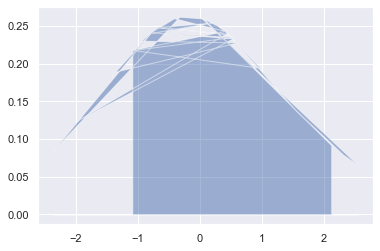

In [25]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

df = pd.util.testing.makeDataFrame()
df = df.reset_index(drop=True)
X = df[['A']].to_numpy()
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
log_density = kde.score_samples(X)
X.reshape(-1, )

plt.fill_between(X.reshape(-1,), np.exp(log_density), alpha=0.5)
# plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1)
# plt.ylim(-0.02, 0.22)


In [36]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex",
                   marginal="rug    ",  # or violin, rug
                   hover_data=df.columns)
fig.show()


In [138]:
from scipy import stats
rng = np.random.default_rng()
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
x, p = stats.ttest_ind(rvs1.tolist(), rvs2.tolist(), equal_var=False)
str(round(100*p)) + '%'


'57%'

In [127]:
rvs1.tolist()


[-1.5758894836419763,
 -6.1384524968412695,
 7.3064613421052185,
 -6.433517752850326,
 13.460059192981323,
 7.832628794301499,
 -0.3505985174680726,
 -3.6214407393304775,
 -4.2531227123399145,
 -6.754830777966095,
 -9.68630463777458,
 -1.913319071790836,
 -11.140644192696964,
 20.277875610410284,
 1.3653658387810186,
 -10.447443074320189,
 16.74560053951648,
 31.531889481412495,
 -11.316861073538963,
 8.245808291757186,
 10.621260615609105,
 0.032533498348833234,
 17.641631959454667,
 2.564141962797687,
 -5.743867408298829,
 3.0632540392132723,
 15.699977432717567,
 2.74044675943163,
 -0.0453072363416851,
 3.9528733655271564,
 -2.841892859712357,
 21.067279759655435,
 -1.570012442375325,
 11.318463727011135,
 2.0071048411735077,
 -4.059308965047604,
 14.681241290740878,
 -2.868458137178818,
 -7.665226968368241,
 17.715008546070983,
 13.85216713270525,
 -13.050888458682575,
 3.6331881071525585,
 17.37408981605707,
 -3.97714961274424,
 3.63192451516498,
 16.604995024105467,
 7.6220500862